In [2]:
import numpy as np
from scipy import misc
from sklearn.linear_model import LogisticRegression
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
#(b)display train and test faces
train_labels, train_data = [],[]
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
test_labels, test_data = [],[]
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


(540, 2500) (540,)


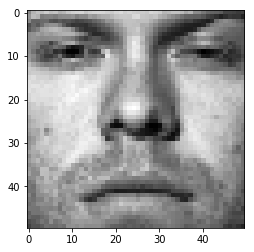

(100, 2500) (100,)


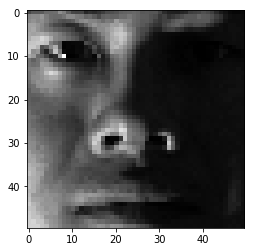

In [4]:
print train_data.shape, train_labels.shape
plt.imshow(train_data[10,:].reshape(50,50),cmap=cm.Greys_r)
plt.show()
print test_data.shape, test_labels.shape
plt.imshow(test_data[10,:].reshape(50,50),cmap=cm.Greys_r)
plt.show()

(2500,)


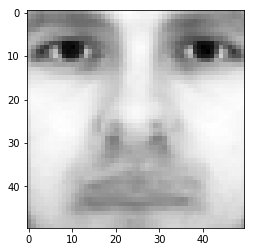

In [5]:
#(c) average face.
avg_face = train_data.sum(axis=0)/len(train_data)
print avg_face.shape
plt.imshow(avg_face.reshape(50,50),cmap=cm.Greys_r)
plt.show()

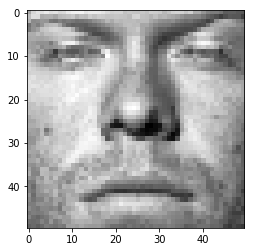

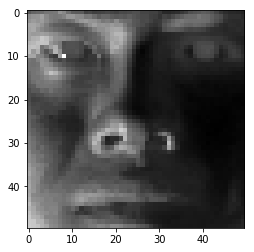

In [6]:
#(d) Mean subtraction
train_data_submean = train_data - avg_face
plt.imshow(train_data_submean[10,:].reshape(50,50),cmap=cm.Greys_r)
plt.show()
test_data_submean = test_data - avg_face
plt.imshow(test_data_submean[10,:].reshape(50,50),cmap=cm.Greys_r)
plt.show()

In [7]:
#(e)eigen face
u,s,vt = np.linalg.svd(train_data)

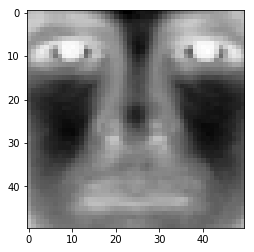

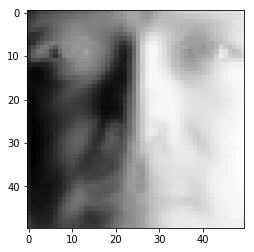

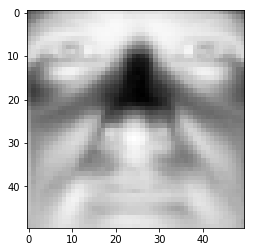

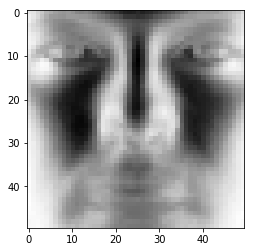

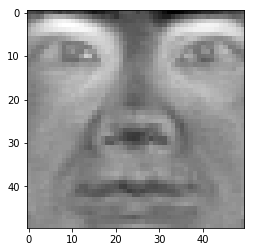

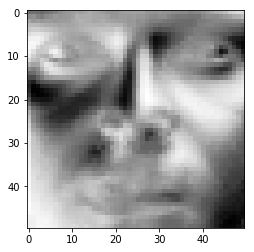

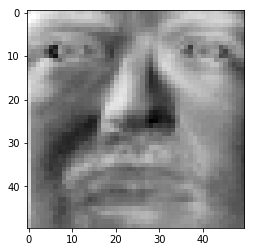

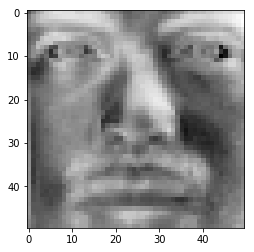

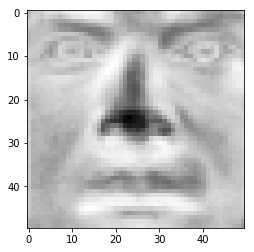

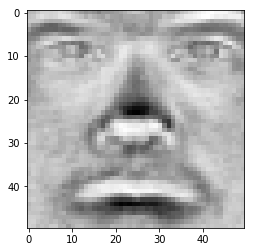

In [8]:
for i in range(10):
    plt.imshow(vt[i,:].reshape(50,50),cmap=cm.Greys_r)
    plt.show()
    

In [9]:
#(f)low rank approx.
def low_rank(u,s,vt,r):
    #print(u[:,:r].shape,np.diag(s[:r].shape),vt[:r,:].shape)
    low_rank_train = np.matmul(np.matmul(u[:,:r],np.diag(s[:r])),vt[:r,:])
    return low_rank_train
def get_error(low_rank_train):
    return np.linalg.norm(train_data-low_rank_train)

In [10]:
x_ax = []
y_ax = []
for i in range(1,201):
    x_ax.append(i)
    y_ax.append(get_error(low_rank(u,s,vt,i)))

Text(0,0.5,'Error')

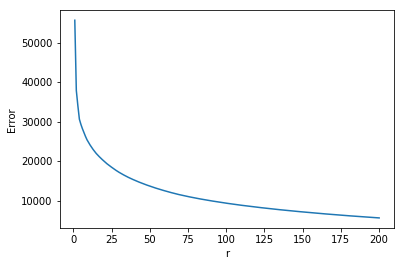

In [11]:
plt.plot(x_ax,y_ax)
plt.xlabel('r')
plt.ylabel('Error')

In [12]:
#(g)eigenface
def get_feat_matrix(train_data,test_data,vt,r):
    feat_train = np.matmul(train_data,np.transpose(vt[:r,:]))
    feat_test = np.matmul(test_data,np.transpose(vt[:r,:]))
    return(feat_train,feat_test)

In [13]:
feat_train,feat_test = get_feat_matrix(train_data,test_data,vt,10)
clf = LogisticRegression(multi_class='ovr').fit(feat_train, train_labels)
clf.score(feat_test,test_labels)

0.84

In [15]:
r_val = []
acc = []
for i in range(1,201):
    r_val.append(i)
    feat_train,feat_test = get_feat_matrix(train_data,test_data,vt,i)
    clf = LogisticRegression(multi_class='ovr').fit(feat_train, train_labels)
    acc.append(clf.score(feat_test,test_labels))

Text(0,0.5,'accuracy')

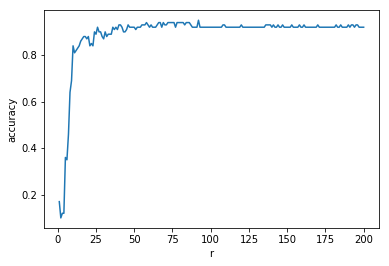

In [16]:
plt.plot(r_val,acc)
plt.xlabel('r')
plt.ylabel('accuracy')